# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we are going to analyze the important factors that affect the show up of the patients for their scheduled appointment based on 100k medical appointments in Brazil. knowing that `no-show` will be our dependent variable and `age`,`gender`,`sms_received` are going to be independent variables.

In [2]:
# import all of the packages I am going to use:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Now, let's load the dataset to assess and clean it to be prepared for plotting. 

### General Properties

In [3]:
# Load your data and print out a few lines:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# inspect data types:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
# the number of rows and columns:
df.shape

(110527, 14)

In [6]:
# look for instances of missing or possibly errant data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# quick making sure that the dataset has no missing values:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> **Findings #1**: The dataset has no missing values.

In [8]:
# the number of unique values in each column:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
# some useful descriptive statistics for each column:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
# check for duplicates:
df.duplicated().sum()

0

> **Findings #2**: The dataset has no duplicates.

In [11]:
# convert columns headers to lower-cased:
df.columns = df.columns.str.lower()

In [12]:
# make sure that columns headers is lower-cased:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Note #1**: I have converted the letter case of all column headers to be lower-cased, I prefer working this way for consistency.

In [13]:
# drop some columns I am not going to use:
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)

In [14]:
# make sure patientid' and 'appointmentid columns are dropped
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Note #2**: I have dropped `patientid` and `appointmentid` columns as I am not going to use them in my analysis.

### Data Cleaning 

> **Findings #3**: The dataset has neither missing values nor nan cells, and the data types look fine to me except `scheduledday` and `appointmentday`, they should be datetime format and below I have converted them.

> Also, I have dropped the wrong value (-1) in `age` column, and replaced the outlier with the mean. 

##### First: change the data types of `scheduledday` and `appointmentday` to be Date Time format.

In [15]:
# convert dtype of `scheduledday` and 'appointmentday' into datetime:
df.scheduledday = pd.to_datetime(df.scheduledday)
df.appointmentday = pd.to_datetime(df.appointmentday)

In [16]:
# 1 make sure that dtypes of `scheduledday` and 'appointmentday' is formatted as datatime:
type(df['scheduledday'][0])
type(df['appointmentday'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
# 2 make sure that dtypes of `scheduledday` and 'appointmentday' is formatted as datatime:
df.dtypes

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no-show                        object
dtype: object

##### Second: remove value (-1) from `age` column as it's a wrong value.

In [18]:
# remove the row that contains the wrong value of `age` column:
df.drop(df[df['age'] == -1].index ,axis=0,inplace=True)

##### Third: remove the outliers of `age` column (> 100) as it probably is a typo.


In [19]:
# remove the outliers of `age` column (> 100): 
df.drop(df[df['age'] > 100].index ,axis=0,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> Let's start by seeing the data frame histogram.

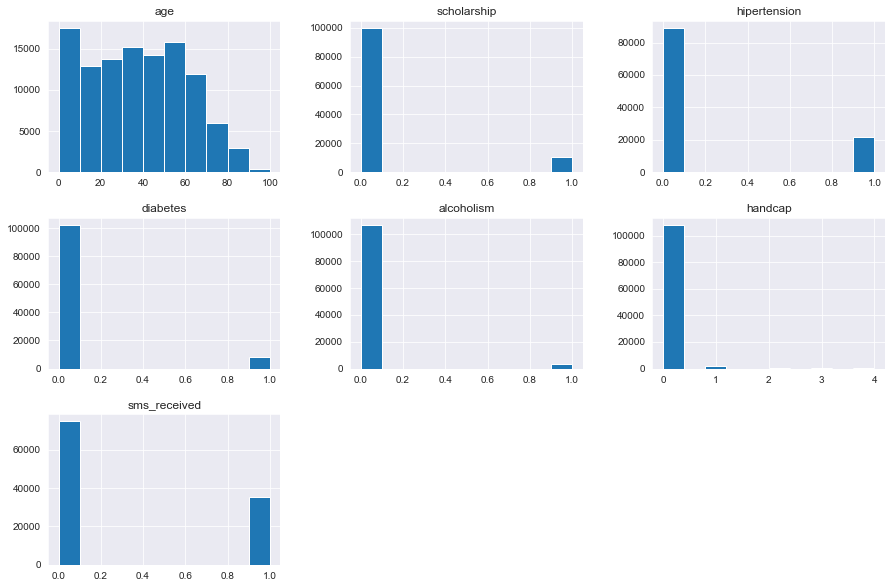

In [20]:
# dataframe visualization:
df.hist(figsize=(15, 10));

### Research Question 1 (Age and Showups Relationship)
> #### Let's see the relationship between `age` and `no-show`

In [21]:
# creare showup and no_showup filters:
showup = df['no-show'] == 'No'
no_showup = df['no-show'] == 'Yes'

In [22]:
# find the mean info of each given no-show with groupby:
df.groupby(['no-show'], as_index=False).mean()

,no-show,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
0,No,37.787297,0.093908,0.204392,0.073841,0.030418,0.022732,0.291339
1,Yes,34.306820,0.115522,0.169027,0.064080,0.030337,0.020165,0.438430


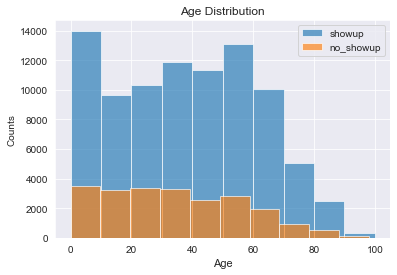

In [23]:
# plot age distribution
df.age[showup].hist(alpha=0.65, label='showup')
df.age[no_showup].hist(alpha=0.65, label='no_showup')
plt.title('Age Distribution')
plt.xlabel('Age', fontsize=11)
plt.ylabel('Counts')
plt.legend();

> **Findings #4**: We can see that the age distribution is very close in both cases. Therefore, we can conclude that the `age` factor has no huge impact on meeting the scheduled day.

### Research Question 2 (Gender and Showups Relationship)
> #### Let's see the relationship between `gender` and `no-show`

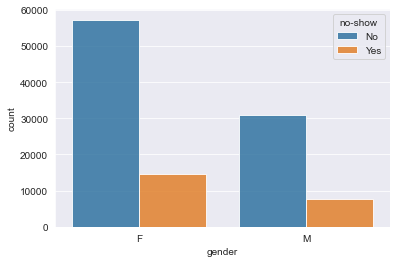

In [24]:
sns.countplot(x='gender', hue = 'no-show', alpha=0.85, data = df);

> We can see that `Female` has a higher rate in no-show than `Male`. But, I think the total counts for each gender needs to be calculated to make a considerable comparison. 


In [36]:
# total counts for each gender:
df.gender.value_counts()

F    71832
M    38687
Name: gender, dtype: int64

> Females total counts is much higher. So, let's see the total counts for each gender in case of showing up and no showing up.

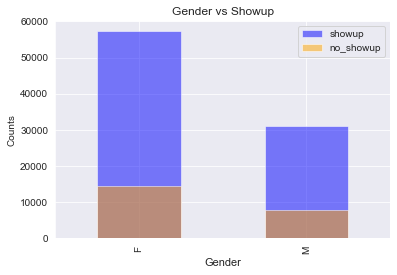

In [26]:
df.gender[showup].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='showup')
df.gender[no_showup].value_counts().plot(kind='bar', alpha=0.5, color='orange', label='no_showup')
plt.title('Gender vs Showup')
plt.xlabel('Gender', fontsize=11)
plt.ylabel('Counts')
plt.legend();

> **Findings #5**: Females that made appointments are almost double and because of that Females have a much higher show rate than Males.

### Research Question 3 (sms_received and Showups Relationship)
> #### Let's see the relationship between `sms_received` and `no-show`

##### Let's start by calculating the total counts of who received SMS.

In [37]:
# total counts for who recieved sms
df['sms_received'].value_counts(normalize=True) * 100

0    67.896018
1    32.103982
Name: sms_received, dtype: float64

In [39]:
# check that did all people received SMS, showed up:
df.groupby(['sms_received','no-show'], as_index=False).size()

,sms_received,no-show,size
0,0,No,62506
1,0,Yes,12532
2,1,No,25697
3,1,Yes,9784


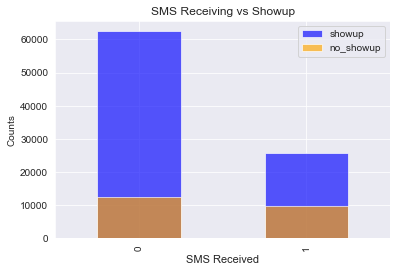

In [29]:
# see it visually
df.sms_received[showup].value_counts().plot(kind='bar', alpha=0.65, color='blue', label='showup')
df.sms_received[no_showup].value_counts().plot(kind='bar', alpha=0.65, color='orange', label='no_showup')
plt.title('SMS Receiving vs Showup')
plt.xlabel('SMS Received', fontsize=11)
plt.ylabel('Counts')
plt.legend();

> **Findings #6**: We can see that sending SMS has no impact on showing up on the scheduled day.

<a id='conclusions'></a>
## Conclusions

> #### After going through the above analysis, we can conclude the following: 
> 1. Knowing that Females have much more appointments than Males. Apparently, they care more for themselves.
> 2. Sending SMS before the appointments has no impact on showing up.
> 3. The average age of who showed up and those who didn't is pretty close (showed average age is 34 years and didn't show is almost 38 years).


<a id='conclusions'></a>
## Limitations

> Distance between the patient's house and hospital would help to produce further insightful.

> Patient's responsibilities would affect the result of the analysis.